## 2.1 数据操作

### 2.1.1 入门

In [5]:
import torch

In [10]:
# 生成 [0, 12) 之间的张量列表
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [11]:
# x的形状
x.shape

torch.Size([12])

In [12]:
# 返回x的元素的个数，如果是个图像， 那么就是返回图像的像素个数
x.numel()

12

In [13]:
# 重新设置x 的形状
# 为什么是X而不是x？一般来说小写表示一维向量，大写表示多维向量
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [19]:
# 生成 2x3x4 的全0张量

"""
问题：为什么使用torch.zeros((2, 3, 4))，而不是torch.zeros(2, 3, 4) ？

- 两种形式的调用实际上是等效的。
- torch.zeros(2, 3, 4)：这种调用直接将维度作为参数传递给 torch.zeros 函数。
- torch.zeros((2, 3, 4))：这种调用则是将维度封装在一个元组中传递。这是 Python 中常见的传递多个参数的形式，特别是当参数数量或结构在运行时可能变化时。

后者的优点：使用元组形式 (2, 3, 4) 传递尺寸参数在动态参数传递或者函数或方法中的参数传递时更具灵活性
"""

torch.zeros((2, 3, 4))


tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [20]:
# 生成 2x3x4 的全1张量

torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [21]:
# 生成指定大小的标准正态分布的张量

torch.randn((3,4))

tensor([[-0.5700,  2.1607,  1.5786,  0.4552],
        [-0.8276,  0.7139,  0.6375,  0.9880],
        [-0.5556, -0.8124, -0.2743,  0.3826]])

In [22]:
# 从列表中生成张量

torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2 运算符

In [26]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])

# 张量的运算符计算默认是对应位置的张量的计算

print('    x ,', x)
print('    y ,', y)
print('x + y ,', x + y)
print('x - y ,', x - y)
print('x * y ,', x * y)
print('x / y ,', x / y)
print('x ** y,', x ** y)

    x , tensor([1., 2., 4., 8.])
    y , tensor([2, 2, 2, 2])
x + y , tensor([ 3.,  4.,  6., 10.])
x - y , tensor([-1.,  0.,  2.,  6.])
x * y , tensor([ 2.,  4.,  8., 16.])
x / y , tensor([0.5000, 1.0000, 2.0000, 4.0000])
x ** y, tensor([ 1.,  4., 16., 64.])


In [27]:
# 指数函数

torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [29]:
# 生成[0, 12)张量。类型为float32，并重新调整大小为(3,4)
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
# 生成自定义张量
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
# 按照不同的维度进行拼接
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [32]:
X, Y

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[2., 1., 4., 3.],
         [1., 2., 3., 4.],
         [4., 3., 2., 1.]]))

In [44]:
X = torch.arange(0, 24).reshape((2,3,4))
Y = torch.arange(24, 48).reshape((2,3,4))

torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1), torch.cat((X, Y), dim=2)

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]],
 
         [[24, 25, 26, 27],
          [28, 29, 30, 31],
          [32, 33, 34, 35]],
 
         [[36, 37, 38, 39],
          [40, 41, 42, 43],
          [44, 45, 46, 47]]]),
 tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11],
          [24, 25, 26, 27],
          [28, 29, 30, 31],
          [32, 33, 34, 35]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23],
          [36, 37, 38, 39],
          [40, 41, 42, 43],
          [44, 45, 46, 47]]]),
 tensor([[[ 0,  1,  2,  3, 24, 25, 26, 27],
          [ 4,  5,  6,  7, 28, 29, 30, 31],
          [ 8,  9, 10, 11, 32, 33, 34, 35]],
 
         [[12, 13, 14, 15, 36, 37, 38, 39],
          [16, 17, 18, 19, 40, 41, 42, 43],
          [20, 21, 22, 23, 44, 45, 46, 47]]]))

In [31]:
"""
如何确定链接的条件，dim=0 还是dim=1。
比如一个 (3,4) 的向量。就是3行，4列。
dim=0 是行，按照dim=0拼接，也就是按照行拼接，相当于把Y的行追加到X的行。拼成之后是(6, 4)
dim=1 是列，按照dim=1拼接，也就是按照列拼接，相当于把Y的列追加到X的列。拼成之后是(3, 8)
---
在比如一个(2,3,4)的向量。就是2层，3行4列。
dim=0 是层，按照dim=0拼接，也就是按照层拼接，相当于把Y的层追加到X的层。拼成之后是(4, 3, 4)
"""

'\n如何确定链接的条件，dim=0还是dim=1\n\n\n'

In [20]:
# 判定 X == Y 
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [43]:
# 求和，
X.sum()

tensor([[12, 15, 18, 21],
        [48, 51, 54, 57]])

### 2.1.3 广播机制

In [50]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [51]:
# 拼接的时候会进行广播，也就是扩张行和列。
(a + b).shape

torch.Size([3, 2])

### 2.1.4 索引和切片

In [54]:
X = torch.arange(12).reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [58]:
# 第一维的最后一行的所有列，也就是X[2,:]
print(X[-1])
# 第一维的12行的所有列，也就是X[1:2, :]
X[1:3]

tensor([ 8,  9, 10, 11])


tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [59]:
# 第1行第2列赋值为 9
X[1, 2] = 9
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

In [31]:
# 0,1行的所有列赋值为12
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 2.1.5 节省内存

In [61]:
"""
id(x) 返回x所在的地址
这段代码表示，Y = Y + X 会给Y重新分配一块内存地址，这样就浪费了内存。
"""
before = id(Y)
Y = Y + X
id(Y) == before

False

In [60]:
# 创建一个形状和Y一样的张量Z
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))

# 先开辟Z的空间，再进行赋值，这样就可以合理利用内存。
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 2311695591040
id(Z): 2311695591040


In [62]:
Z[:] = X + Y
Z

tensor([[[24, 27, 30, 33],
         [36, 39, 48, 45],
         [48, 51, 54, 57]],

        [[36, 39, 42, 45],
         [48, 51, 60, 57],
         [60, 63, 66, 69]]])

### 2.1.6. 转换为其他Python对象

In [64]:
# 转换 A 成numpy类型
A = X.numpy()
# 转换 B 为Tensor类型
B = torch.tensor(A)

type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [68]:
a = torch.tensor([3.5])

print(type(a), type(a.item()), type(float(a)), type(int(a)))
print(a, a.item(), float(a), int(a))

<class 'torch.Tensor'> <class 'float'> <class 'float'> <class 'int'>
tensor([3.5000]) 3.5 3.5 3


### 2.1.8 练习

1. 运行本节中的代码。将本节中的条件语句X == Y更改为X < Y或X > Y，然后看看你可以得到什么样的张量。

In [44]:
X > Y

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

会逐个元素进行比较，然后输出比较的结果。

2. 用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量。结果是否与预期相同？

In [78]:
# 一个向量的size必须是另一个的结尾，比如（2,3,4）和（3,4）；（3,4,5,）和（4,5）
X1 = torch.zeros(2, 3, 4)
Y1 = torch.ones(3, 4)

X1 + Y1

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

张量的广播机制有以下要求：

1. 后缘维度的对齐
从张量的右侧向左侧对齐它们的尺寸（即对齐最内层的维度）。例如，一个 256×1×64×32 的张量可以与一个 64×32 的张量进行广播。

2. 维度兼容性
两个张量的对应维度需要兼容。维度兼容有两种情况：
- 对应维度的大小相等。
- 其中一个张量在该维度上的大小为1。
如果这两种情况都不满足，那么在该维度上无法进行广播，尝试运算将导致错误。

3. 维度扩展
如果一个张量在某个维度上的大小为1，并且另一个张量在该维度上的大小大于1，那么第一个张量在这个维度上会被“拉伸”或者说复制扩展至匹配较大的尺寸。这种扩展不会实际复制数据，而是在计算过程中虚拟地进行。

4. 缺失维度的添加
如果一个张量的维度数少于另一个，那么会在较小张量的左侧添加维度（维度大小为1），直到两者的维度数相同。

In [81]:
# 创建形状为 (8, 1, 6, 1) 的张量
A = torch.rand(8, 1, 6, 1)

# 创建形状为 (7, 1, 5) 的张量
B = torch.rand(7, 1, 5)

# 尝试广播两个张量
# A 的形状被视为 (8, 1, 6, 1)
# B 的形状将自动扩展为 (1, 7, 1, 5)
# 经过广播后，最终形状将是 (8, 7, 6, 5)
C = A + B

## 2.2 数据预处理

### 2.2.1 读取数据集

In [83]:
import os

# 创建目录，exist_ok=True指定了如果文件存在，不抛出异常；如果设置为False，则如果文件存在，就抛出异常。
os.makedirs(os.path.join('data'), exist_ok=True)
# 创建文件
data_file = os.path.join('data', 'house_tiny.csv')
# 写入文件
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [84]:
# 如果没有安装pandas，只需取消对以下行的注释来安装pandas
# !pip install pandas
import pandas as pd
# 读文件
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### 2.2.2 处理缺失值

In [87]:
# 输入为所有行的前两列，输出为所有行的第2列
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
print(inputs)
# 使用平均值填补缺失值(只针对于数值列)
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       NaN  Pave
1       2.0   NaN
2       4.0   NaN
3       NaN   NaN
   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [96]:
# pd.get_dummies()函数将数据框中的分类变量转换为多个二进制（0或1）列，每个可能的类别对应一个新的列。
# dummy_na=True 是 get_dummies 函数的一个参数，用于指定是否为NaN（不是数字，可以视为缺失数据）创建额外的虚拟（哑）列。设置为 True 表示将NaN视为一个有效的类别值，并为其创建单独的哑变量列。
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


### 2.2.3 转换为张量格式

In [97]:
# 在 NumPy 中，float 默认对应于 Python 的内置 float 类型，这实际上是一个双精度浮点数（64位）。因此，当在 NumPy 中使用 numpy.float 或简单地指定一个浮点数时，通常是使用的 numpy.float64。
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

### 2.2.5 练习

In [94]:
# 读取数据
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


1. 删除缺失值最多的列。

In [98]:
"""
data.isnull().sum()：
- data.isnull() 生成一个与 data DataFrame相同形状的布尔型DataFrame，其中的元素为 True 如果原位置的数据是缺失的（即NaN），否则为 False。
- .sum() 方法在此上调用，用于计算每一列中 True（即缺失值）的数量。这个方法默认在轴 axis=0（列方向）上操作，返回每一列的缺失值总数。

.idxmax()：
- idxmax() 函数用于返回缺失值数量最多的那列的列名（或索引）。它找到 data.isnull().sum() 返回的系列中的最大值对应的索引。
"""

data = data.drop([data.isnull().sum().idxmax()], axis=1)

2. 将预处理后的数据集转换为张量格式。

In [72]:
"""
转换成张量格式
"""

torch.tensor(data.to_numpy(dtype=torch.float32))

tensor([[       nan, 1.2750e+05],
        [2.0000e+00, 1.0600e+05],
        [4.0000e+00, 1.7810e+05],
        [       nan, 1.4000e+05]])

## 2.3 线性代数

### 2.3.1 标量

In [99]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2. 向量

In [3]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [4]:
x[2]

tensor(2)

In [5]:
len(x)

4

In [6]:
x.shape

torch.Size([4])

### 2.3.3 矩阵

In [8]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [9]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [102]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [103]:
# 转置矩阵
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4 张量

In [12]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5 张量算法的基本性质

In [14]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]], dtype=torch.float64),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]], dtype=torch.float64))

In [15]:
# 对应位置相乘
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]], dtype=torch.float64)

In [16]:
a = 2
X = torch.arange(24).reshape(2,3,4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6 降维

In [17]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [18]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190., dtype=torch.float64))

In [20]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]], dtype=torch.float64)

In [21]:
A.sum(axis=0)

tensor([40., 45., 50., 55.], dtype=torch.float64)

In [22]:
A.sum(axis=1)

tensor([ 6., 22., 38., 54., 70.], dtype=torch.float64)

In [23]:
A.sum(axis=[0, 1])

tensor(190., dtype=torch.float64)

In [24]:
A.mean(), A.sum(axis=0) / A.shape[0]

(tensor(9.5000, dtype=torch.float64),
 tensor([ 8.,  9., 10., 11.], dtype=torch.float64))

In [25]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]], dtype=torch.float64)

In [26]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]], dtype=torch.float64)

In [27]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]], dtype=torch.float64)

In [28]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]], dtype=torch.float64)

### 2.3.7 点积

In [29]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [104]:
torch.sum(x * y)

tensor(6.)

### 2.3.8 矩阵-向量积

In [39]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
x = torch.arange(4, dtype=torch.float32)
A, x

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([0., 1., 2., 3.]))

In [40]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### 2.3.9 矩阵乘法

In [41]:
B = torch.ones(4, 3, dtype=torch.float32)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

### 2.3.10 范数

In [42]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [43]:
torch.abs(u).sum()

tensor(7.)

In [44]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

### 练习

1. 证明A转置的转置是A

In [46]:
A = torch.ones(4, 3, dtype=torch.float32)
A

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [47]:
A == A.T.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True]])

2. 证明转置的和是和的转置

In [51]:
A = torch.rand(4, 3, dtype=torch.float32)
B = torch.rand(4, 3, dtype=torch.float32)
A, B

(tensor([[0.2211, 0.3792, 0.8870],
         [0.1934, 0.2260, 0.3123],
         [0.1366, 0.9769, 0.0703],
         [0.4577, 0.9713, 0.2500]]),
 tensor([[0.4968, 0.5481, 0.5972],
         [0.1840, 0.6806, 0.0380],
         [0.7465, 0.4901, 0.3002],
         [0.0177, 0.1475, 0.0057]]))

In [52]:
(A + B).T == (A.T + B.T)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

3. A+A.T总是对称吗？

In [61]:
A = torch.rand(3, 3, dtype=torch.float32)
B = A + A.T
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

4. 本节中定义了形状(2, 3, 4)的张量X。len(X)的输出结果是什么？

In [62]:
A = torch.ones(2,3,4)
# 输出dim=0的数字
len(A)

2

5. 对于任意形状的张量X,len(X)是否总是对应于X特定轴的长度?这个轴是什么?


按照dim=0的轴

In [63]:
A = torch.ones(3,2,4)
len(A)

3

In [64]:
A = torch.ones(4,3,2)
len(A)

4

6. 运行A/A.sum(axis=1)，看看会发生什么。请分析一下原因？

In [68]:
A = torch.arange(20).reshape(4,5)
A

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

In [74]:
A/A.sum(axis=1)

RuntimeError: The size of tensor a (5) must match the size of tensor b (4) at non-singleton dimension 1

In [72]:
A.sum(axis=1)

tensor([10, 35, 60, 85])

除不开，除非保持A的维度

In [75]:
A/A.sum(axis=1,keepdims=True)

tensor([[0.0000, 0.1000, 0.2000, 0.3000, 0.4000],
        [0.1429, 0.1714, 0.2000, 0.2286, 0.2571],
        [0.1667, 0.1833, 0.2000, 0.2167, 0.2333],
        [0.1765, 0.1882, 0.2000, 0.2118, 0.2235]])

7. 考虑一个具有形状(2, 3, 4)的张量，在轴0、1、2上的求和输出是什么形状?

In [79]:
A = torch.arange(24, dtype=torch.float64).reshape(2,3,4)
A.sum(axis=0), A.sum(axis=1), A.sum(axis=2)

(tensor([[12., 14., 16., 18.],
         [20., 22., 24., 26.],
         [28., 30., 32., 34.]], dtype=torch.float64),
 tensor([[12., 15., 18., 21.],
         [48., 51., 54., 57.]], dtype=torch.float64),
 tensor([[ 6., 22., 38.],
         [54., 70., 86.]], dtype=torch.float64))

8. 为linalg.norm函数提供3个或更多轴的张量，并观察其输出。对于任意形状的张量这个函数计算得到
什么?

In [80]:
A

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]],

        [[12., 13., 14., 15.],
         [16., 17., 18., 19.],
         [20., 21., 22., 23.]]], dtype=torch.float64)

In [83]:
torch.linalg.norm(A, axis=0)

tensor([[12.0000, 13.0384, 14.1421, 15.2971],
        [16.4924, 17.7200, 18.9737, 20.2485],
        [21.5407, 22.8473, 24.1661, 25.4951]], dtype=torch.float64)

In [84]:
torch.linalg.norm(A, axis=1)

tensor([[ 8.9443, 10.3441, 11.8322, 13.3791],
        [28.2843, 29.9833, 31.6860, 33.3916]], dtype=torch.float64)

In [85]:
torch.linalg.norm(A, axis=2)

tensor([[ 3.7417, 11.2250, 19.1311],
        [27.0924, 35.0714, 43.0581]], dtype=torch.float64)

## 2.4 微积分

### 2.4.1 导数和微分

In [1]:
%matplotlib inline
import numpy as np  
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [2]:
def f(x):
  return 3 * x ** 2 - 4 * x

# 返回数值上的导数
def numerical_lim(f, x, h):
  return (f(x + h) - f(x)) / h

h = 0.1

for i in range(5):
  print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
  h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [3]:
def use_svg_display(): #@save
  # 使用SVG格式在jupyter中显示绘图
  backend_inline.set_matplotlib_formats('svg')

In [4]:
def set_figsize(figsize=(3.5, 2.5)): #@save
  # 使用svg显示图像
  use_svg_display()
  # 设置图像大小
  d2l.plt.rcParams['figure.figsize'] = figsize

In [5]:
#@save
# 对axes进行详细设置
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
  """设置matplotlib的轴"""
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)
  axes.set_xscale(xscale)
  axes.set_yscale(yscale)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  if legend:
    axes.legend(legend)
  axes.grid()

In [41]:
#@save
# 绘图函数
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None,
         xlim=None, ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
  if legend is None:
    legend = []

  # 设置图像大小
  set_figsize(figsize)
  
  """
  plt.gca() 是一个函数调用，代表 "get current axes"。这个函数的作用是获取当前图形（figure）中的当前轴域（axes）
  如果调用 plot 函数时用户已经提供了一个 axes 对象，那么就使用这个提供的 axes。
  如果没有提供（即 axes 为 None 或者逻辑假），则调用 plt.gca() 获取当前活动的axes，或者如果不存在当前活动的axes，则创建一个新的axes。
  """
  axes = axes if axes else d2l.plt.gca()
  
  """
  hasattr(X, "ndim") 检查X是否有ndim属性，也就是检查是否是numpy数组，如果是numpy数组就会返回True
  and X.ndim == 1 表示X的维度是1，也就是X是一维数组
  
  * or *
  
  isinstance(X, list) 检查X是否是Python列表
  and not hasattr(X[0], "__len__")) 如果 X 是列表，进一步检查列表的第一个元素是否没有 __len__ 方法。
    如果一个对象没有 __len__ 方法，通常意味着它不是一个容器类的对象（如数字、布尔值等），
    从而可以推断列表 X 是由单一数据类型的元素组成的一维列表。
  
  -> 综上，这两个条件，用于检查 X 是否是一个包含非容器类元素的一维列表。
  """
  def has_one_axis(X):
    return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) 
            and not hasattr(X[0], "__len__"))
  
  """
  如果X是个一维列表，则将X封装进一个列表。
  *为什么要用X = [X] 封装进列表？
  ->  因为XY可能不是一一对应的，也就是说可能会绘制一个X对应的多个Y的图像。
      比如plot(x, [f(x), 2 * x - 3].....)其中的x是一维列表，Y是一个二维列表。
      我们会在最后的循环中遍历 X, Y 绘制图像，要提前保证X, Y都是二维列表。
  """
  if(has_one_axis(X)):
    X = [X]

  """
  如果没有提供Y，则，先将Y赋值为X，再将X置为多个空列表，以绘制只有Y的图像
    如果X = [[-1, 0, 1], [1, 2, 3]], Y = None 也就是只绘制两组X的值，Y为空
    则变化之后 X = [[], []]用来控制绘制顺序, Y = [[-1, 0, 1], [1, 2, 3]]
    最后绘制的时候axes.plot(y, fmt), y是作为Y的值传入的。
     -> 如果在使用 Matplotlib 的 axes.plot() 方法时只提供了一个参数
        那么 Matplotlib 会默认这个参数实际上是 y 值，而 x 值将自动采用默认的索引，0.1.2.3...
    绘制的曲线为：
    1. x = [0, 1, 2] y = [-1, 0, 1]
    2. x = [0, 1, 2] y = [1, 2, 3]
  如果Y是一维的，则将Y封装为[Y]
  """
  if Y is None:
    X, Y = [[]] * len(X), X
  elif has_one_axis(Y):
    Y = [Y]

  """
  如果X和Y的长度不相等，也就是需要绘制一个X对应多个Y的图像，就把X扩展到和Y一样的大小。
  比如X = [[1, 2, 3]] Y = [[4, 5, 6], [7, 8, 9]]
  这时候要将其变成 X = [[1, 2, 3], [4, 5, 6]] Y = [[1, 2, 3], [7, 8, 9]]
  绘制的曲线为
  1. x = [1, 2, 3] y = [4, 5, 6]
  2. x = [1, 2, 3] y = [7, 8, 9]
  """
  if len(X) != len(Y):
    X = X * len(Y)
  
  # 清除所有axes，为新的绘图做准备
  axes.cla()

  """
  遍历所有的X, Y中的元素，fmt为绘制的图像风格。逐个绘制图像。
  如果当前x不为空，则绘制xy对应的图像
  如果当前x为空，则绘制y, x为默认值的图像
  """
  for x, y, fmt in zip(X, Y, fmts):
    if len(x): 
        axes.plot(x, y, fmt)
    else:
      axes.plot(y, fmt)
  
  # 设置当前的axes相关参数
  set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


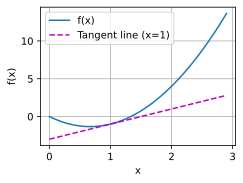

In [45]:
x = np.arange(0, 3, 0.1)

plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

### 练习

1. 绘制函数和切线的图像

In [96]:
def f(x):
  return x ** 3 - 1 / x

In [99]:
h = 0.0001
x = 1

(f(x + h) - f(x)) / h # tangent

4.0002000199979015

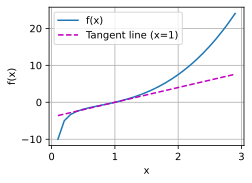

In [106]:
x = np.arange(0.1, 3, 0.1)

plot(x, [f(x), 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

2. 求函数的梯度

$$
(6x_1 , 5e^{x_2})
$$

3. 函数的梯度



## 2.5 自动微分

### 2.5.1 一个简单的例子

In [1]:
import torch

In [3]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [4]:
# 手动设置需要自动微分

x.requires_grad_(True)
x.grad

In [5]:
# 2倍x的点积

y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [6]:
# y 进行反向传播，并查看 x 的梯度

y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [7]:
# 验证 x 的梯度

x.grad == 4 * x

tensor([True, True, True, True])

In [8]:
# 梯度归零，方便下次求梯度
x.grad.zero_()

# 分别求x求和过程中每一项的梯度
y = x.sum()
y.backward()

# 查看 x 的梯度
x.grad

tensor([1., 1., 1., 1.])

### 2.5.2 非标量变量的反向传播

In [9]:
# 梯度归零
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 2.5.3 分离计算

In [11]:
# 清空x的梯度
x.grad.zero_()
# 重置y的梯度
y = x * x
# 将张量分离出来，但是require_grad=True
u = y.detach()

z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [119]:
x.grad.zero_()
y.sum().backward()

x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4 Python控制流的梯度计算

In [12]:
"""
本例中，
  无论走哪一条分支，最后都是 c = k * a，梯度为k
  c / a = k 
  因此a.grad == d / a
"""
def f(a):
  b = a * 2
  while b.norm() < 1000:
    b = b * 2
  if b.sum() > 0:
    c = b 
  else:
    c = 100 * b
  return c

In [13]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [14]:
a.grad == d / a

tensor(True)

### 练习

1. 因为二阶导数比一阶导数计算过程复杂， 尤其是涉及多个变量的偏导数。

2. 再次运行反向传播函数

In [16]:
x = torch.arange(4.0, requires_grad=True)
y = 2 * torch.dot(x, x)

y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [20]:
try:
  y.backward()
except:
  print("出现错误！！！")
  pass

出现错误！！！


3. 把a改为随机向量或者矩阵

In [21]:
def f(a):
  b = a * 2
  while b.norm() < 1000:
    b = b * 2
  if b.sum() > 0:
    c = b 
  else:
    c = 100 * b
  return c

a = torch.randn(4, requires_grad=True)
a

tensor([-0.7748,  0.8456,  0.0160,  0.8836], requires_grad=True)

In [23]:
d = f(a)
a.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

4. 控制流梯度

In [146]:
def f(a):
  if a > 0:
    return a ** 2
  else:
    return a ** 3

In [152]:
a = torch.tensor(-8.0, requires_grad=True)
a

tensor(-8., requires_grad=True)

In [153]:
y = f(a)
y.backward()

a.grad == 3 * a ** 2

tensor(True)

上述控制流的梯度中，梯度取决于a的值，a大于0的时候，梯度为2a，反之为3a**2

5. 不求导绘制导数图像

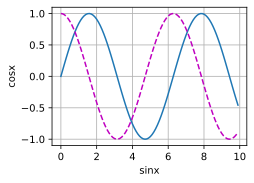

In [188]:
# 创建一个张量 x，范围从0到10，步长为0.1，并且设置requires_grad=True以计算梯度
x = torch.arange(0, 10, 0.1, requires_grad=True)

# 计算 x 的正弦值
sinx = torch.sin(x)

# 计算正弦函数的梯度（即余弦值）
# 使用.sum()使sinx成为标量以调用.backward()
sinx.sum().backward()  

# x.grad 将包含sinx的梯度，即每个点的余弦值
cosx = x.grad

# 输出结果
plot(x.detach().numpy(), [sinx.detach().numpy(), cosx.detach().numpy()], 'sinx', 'cosx')


## 2.6 概率

### 2.6.1 基本概率论

In [24]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [25]:
# 平均概率，使用torch计算
fair_probs = torch.ones([6]) / 6

"""
创建了一个 Multinomial 对象，参数 1 指定每次实验中要抽取的物品数量。
1. 这里的 1 表示每次实验中只抽取一个物品（或进行一次投掷）。
2. fair_probs 作为第二个参数，指定了每个类别的抽取概率。
3. .sample()：调用 .sample() 方法在指定的多项分布中进行一次抽样。
   由于设置了每次抽样抽取一个物品，返回的样本将是一个长度为 6 的张量，其中一个位置为 1，其余位置为 0。
   位置 i 的 1 表示第 i 类被选中。
"""
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 1., 0.])

In [28]:
# 抽样10次
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 1., 0., 2., 4.])

In [29]:
# 抽样100次
counts = multinomial.Multinomial(100, fair_probs).sample()
counts / 100

tensor([0.1500, 0.2000, 0.1500, 0.1200, 0.2200, 0.1600])

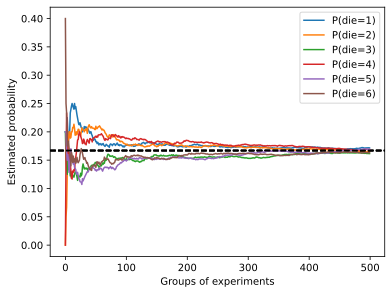

In [30]:
# 每次抽样的数量
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((6, 4.5))

for i in range(6):
  d2l.plt.plot(estimates[:, i].numpy(),
  label=("P(die=" + str(i + 1) + ")"))
  d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
  d2l.plt.gca().set_xlabel('Groups of experiments')
  d2l.plt.gca().set_ylabel('Estimated probability')
  d2l.plt.legend()

### 练习

1. 进行m = 500组实验，每组抽取n = 10个样本。改变m和n，观察和分析实验结果。

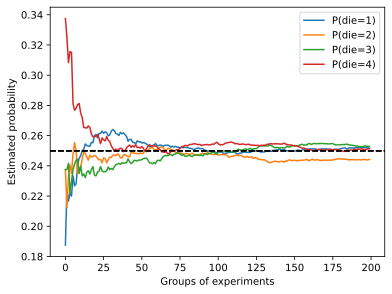

In [216]:
fair_probs = torch.ones([4]) / 4
counts = multinomial.Multinomial(80, fair_probs).sample((200,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((6, 4.5))

for i in range(4):
  d2l.plt.plot(estimates[:, i].numpy(),
  label=("P(die=" + str(i + 1) + ")"))
  d2l.plt.axhline(y=0.25, color='black', linestyle='dashed')
  d2l.plt.gca().set_xlabel('Groups of experiments')
  d2l.plt.gca().set_ylabel('Estimated probability')
  d2l.plt.legend()

2. 给定两个概率为P (A)和P (B)的事件，计算P (A∪B)和P (A∩B)的上限和下限。(提示：使用友元图43来展示这些情况。)

max(A, B)  -- 1

0 -- min(A, B)

3. 假设我们有一系列随机变量，例如A、B和C，其中B只依赖于A，而C只依赖于B，能简化联合概率P (A, B, C)吗

P(A)P(B|A)P(C|B)

4. 在2.6.2节中，第一个测试更准确。为什么不运行第一个测试两次，而是同时运行第一个和第二个测试

运行第一个实验两次，不是相互独立的，不符合贝叶斯的条件。

## 2.7 查阅文档

In [195]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

In [196]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None